In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mutual_info_score
import re

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)


In [4]:
df = pd.read_csv(r"..\features\mergedFakeWithRealData.csv")  

### 1. Basic Information
Check the shape of the dataset, data types, and basic statistics.

In [5]:
# Show basic info about the dataset
print("Shape:", df.shape)
df.info()
df.describe(include="all").T


Shape: (2120, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2120 entries, 0 to 2119
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fraudulent    2120 non-null   int64  
 1   job_title     2120 non-null   object 
 2   job_date      2120 non-null   object 
 3   job_desc      2120 non-null   object 
 4   job_tasks     2120 non-null   object 
 5   comp_name     2120 non-null   object 
 6   comp_type     2120 non-null   object 
 7   comp_size     2106 non-null   object 
 8   eco_activity  1430 non-null   object 
 9   qualif        871 non-null    object 
 10  region        2120 non-null   object 
 11  city          2120 non-null   object 
 12  benefits      2120 non-null   object 
 13  contract      2120 non-null   object 
 14  exper         2120 non-null   int64  
 15  gender        2120 non-null   object 
 16  type          150 non-null    object 
 17  Type          2120 non-null   object 
 18  salary    

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
fraudulent,2120.0,NaN,NaN,NaN,0.306604,0.461192,0.0,0.0,0.0,1.0,1.0
job_title,2120,358,محاسب,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_date,2120,96,28/05/1444,179,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_desc,2120,488,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير المعلومات المتعلقة بالمنتجات واستخداماتها وأسعارها، وتولي أمور الدفع وتلقي المدفوعات من العملاء.'],93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_tasks,2120,474,"[' الرد على رسائل واتساب', ' حفظ ملفات بسيطة', ' ', ' ']",125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comp_name,2120,893,مؤسسة النجاح الفوري,171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comp_type,2120,4,خاص,1677,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comp_size,2106,7,صغيرة فئة ب,681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eco_activity,1430,366,المطاعم مع الخدمة,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
qualif,871,627,"['Language data', 'الانجليزية', 'متوسط']",28,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2. Missing Values
Check which columns have missing values and their percentages.


In [4]:
# Calculate missing values count and percentage
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_df = missing.to_frame("missing_count").assign(missing_pct=(missing/len(df)*100).round(2))
missing_df


,missing_count,missing_pct
type,1970,92.92
qualif,1249,58.92
eco_activity,690,32.55
gender,600,28.30
comp_size,14,0.66


### 3. Duplicates
Check how many duplicate rows exist in the dataset.


In [6]:
# Count duplicate rows
df.duplicated().sum()


18

### 4. Target Distribution
Visualize the distribution of the target column `fraudulent`.


fraudulent
0    69.34
1    30.66
Name: proportion, dtype: float64


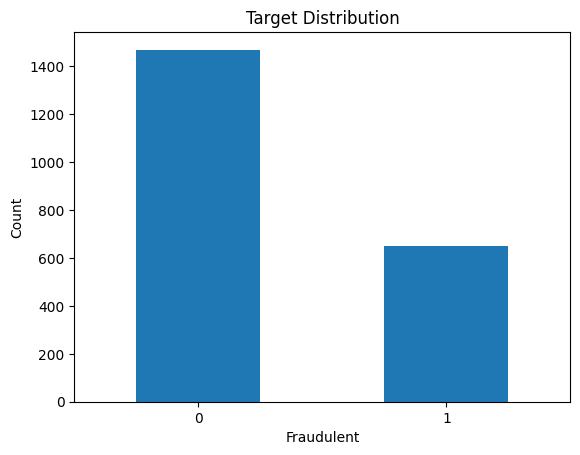

In [7]:
import matplotlib.pyplot as plt

# Value counts and percentages
print(df['fraudulent'].value_counts(normalize=True).mul(100).round(2))

# Plot target distribution
df['fraudulent'].value_counts().plot(kind="bar", title="Target Distribution", rot=0)
plt.xlabel("Fraudulent")
plt.ylabel("Count")
plt.show()


### 5. Categorical Features
Explore the most frequent values in categorical columns.


Categorical columns: ['job_title', 'job_date', 'job_desc', 'job_tasks', 'comp_name', 'comp_type', 'comp_size', 'eco_activity', 'qualif', 'region', 'city', 'benefits', 'contract', 'exper', 'gender', 'type', 'Type']


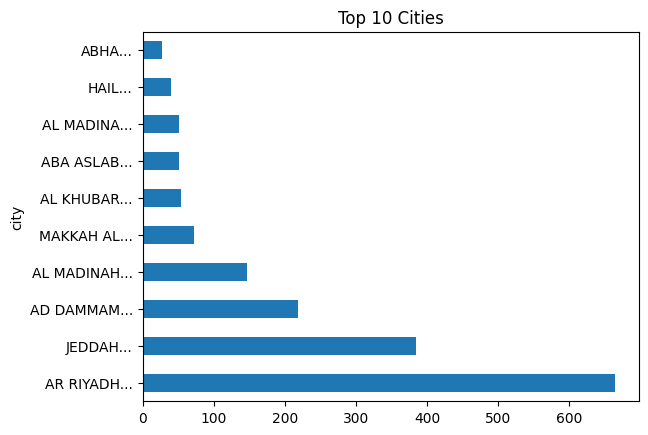

In [8]:
# Identify categorical columns
cat_cols = [c for c in df.columns if df[c].dtype == "object"]
print("Categorical columns:", cat_cols)

# Example: top cities
df['city'].value_counts().head(10).plot(kind="barh", title="Top 10 Cities")
plt.show()


### 6. Text Features
Analyze text columns like `job_desc` by checking the length distribution.


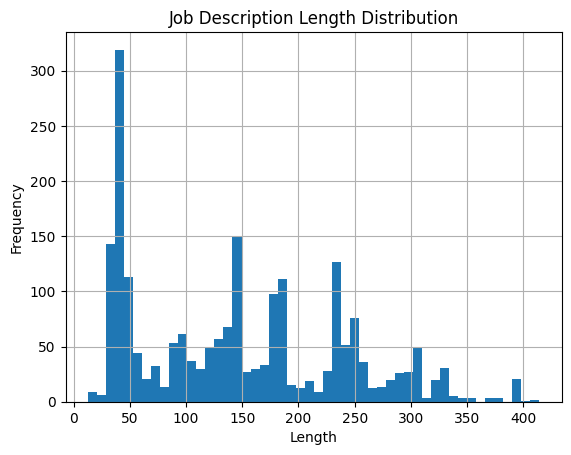

In [9]:
# # Add a new column with text length
# df['desc_len'] = df['job_desc'].astype(str).str.len()

# # Show text length statistics
# df['desc_len'].describe()

# # Plot histogram of text lengths
# df['desc_len'].hist(bins=50)
# plt.title("Job Description Length Distribution")
# plt.xlabel("Length")
# plt.ylabel("Frequency")
# plt.show()


### 7. Correlation
Plot correlation heatmap for numeric features with the target.


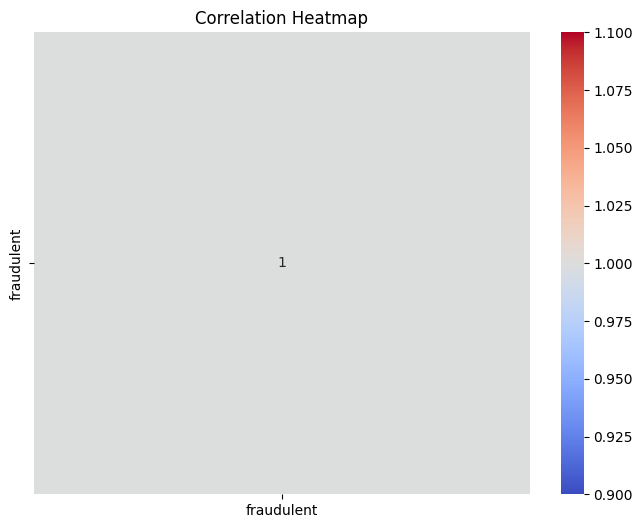

In [8]:
import seaborn as sns

# Correlation matrix
corr = df.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


### 8. Mutual Information
Compute and display top features most related to the target variable.


In [9]:

# Function to calculate MI
def calc_mi(series, target):
    return mutual_info_score(series.fillna("NA"), target)

# Compute MI for each column
mi_scores = df.apply(lambda col: calc_mi(col.astype(str), df['fraudulent']))
mi_scores.sort_values(ascending=False).head(10)


comp_name       0.616356
job_desc        0.616356
fraudulent      0.616356
benefits        0.616356
Type            0.616356
job_tasks       0.616356
gender          0.528675
job_date        0.505415
eco_activity    0.490330
job_title       0.463135
dtype: float64

In [10]:
import numpy as np
import re

def extract_salary(value):
    if pd.isna(value):
        return np.nan

    s = str(value)
    s = s.replace("\u200f", " ").replace("\u200e", " ").strip()
    s = s.replace("[", " ").replace("]", " ").replace("'", " ").replace('"', " ")

    noise_words = [
        "salary", "sar", "riyals", "riyal", "ريال", "الراتب", "راتب", "شهري", "بالشهر", "بالساعة",
        "hour", "monthly", "benefits", "مزايا", "package", "pay", "up to", 
        "حوالي", "تقريباً", "approx", "range", "between", "إلى", "حتى"
    ]
    for w in noise_words:
        s = re.sub(rf"\b{re.escape(w)}\b", " ", s, flags=re.IGNORECASE)

    s = re.sub(r"[^\d\.,]", " ", s)
    tokens = re.findall(r"\d[\d,\.]*", s)

    if not tokens:
        return np.nan

    candidates = []
    for t in tokens:
        if "," in t and "." in t:
            t_norm = t.replace(",", "")
        elif "," in t and t.count(".") == 0:
            t_norm = t.replace(",", "")
        else:
            t_norm = t
        try:
            candidates.append(float(t_norm))
        except:
            continue

    if not candidates:
        return np.nan

    salary_value = max([c for c in candidates if c > 0], default=np.nan)

    if not (500 <= salary_value <= 200000):
        return np.nan

    return float(salary_value)

# ✨ Create new column directly
df["salary"] = df["benefits"].apply(extract_salary)


In [11]:
# Show first 20 rows of benefits with the new salary column
df[["benefits", "salary"]].head(20)


,benefits,salary
0,"['Salary', '4000.0']",4000.0
1,"['Salary', '6500.0']",6500.0
2,"['Salary', '6000.0']",6000.0
3,"['Salary','30000']",30000.0
4,"['Salary','15000']",15000.0
5,"['Salary','20000']",20000.0
6,"['Salary', '4500.0']",4500.0
7,"['Salary','30000']",30000.0
8,"['Salary', '6000.0', 'Benefits', 'تحدد بعد المقابله ']",6000.0
9,"['Salary', '4000.0']",4000.0


In [12]:
df.to_csv(r"..\features\mergedFakeWithRealData.csv", index=False, encoding="utf-8-sig")


In [13]:
# Replace NaN/null values in gender column with "both"
df["gender"] = df["gender"].fillna("both")


def extract_years(value):
    if pd.isna(value):
        return np.nan
    s = str(value)

    match = re.search(r"\d+", s)
    if match:
        return int(match.group())
    return np.nan


df["exper"] = df["exper"].apply(extract_years)

In [14]:
df["gender"].value_counts(dropna=False)
df.to_csv(r"..\features\mergedFakeWithRealData.csv", index=False, encoding="utf-8-sig")



In [11]:
import pandas as pd

# نفس مسارك
file_path = r"..\features\mergedFakeWithRealData.csv"

# اقرأ الملف
df = pd.read_csv(file_path, encoding="utf-8-sig")

# القاموس: انجليزي -> عربي
city_map = {
    "AR RIYADH": "الرياض",
    "JEDDAH": "جدة",
    "MAKKAH": "مكة",
    "AL MADINAH": "المدينة",
    "AL MADINA": "المدينة",
    "AD DAMMAM": "الدمام",
    "AL KHUBAR": "الخبر",
    "AL HUFUF": "الهفوف",
    "AL JUBAIL": "الجبيل",
    "YANBU": "ينبع",
    "AL QUNFID": "القنفذة",
    "AL MUKHWA": "المخواة",
    "BURAYDAH": "بريدة",
    "KHAMIS": "خميس مشيط",
    "ABHA": "أبها",
    "NAJRAN": "نجران",
    "TABUK": "تبوك",
    "HAIL": "حائل",
    "AT TAIF": "الطائف",
    "AL BAHA": "الباحة",
    "AR'AR": "عرعر",
    "DHAHRAN": "الظهران",
    "RAHIMAH": "رحيمة",
    "AL QATIF": "القطيف",
    "AR RASS": "الرس",
    "GHITHAH": "الغاط",
    "ATH THUQB": "الثقبة",
    "BILJURASH": "بلجرشي",
    "AL BIDI": "البدائع",
    "MALHAM": "ملهم",
    "AL JURF": "الجرف",
    "ABAR AL M": "آبار الماشي",
    "ABA ASLAB": "آبا الصلب",
    "AD DIR": "الدرعية",
    "AL MUBARR": "المبرز",
    "ABU MARAG": "أبو معرج",
    "WADI AD D": "وادي الدواسر",
    "TUMAIR": "تمير",
    "AL 'AZIZI": "العزيزية",
    "HAFAR AL": "حفر الباطن",
    "UMM TALHA": "أم تلعة",
    "AL HALQAH": "الحلقة",
    "ABA AL KI": "أبا الكباش",
    "TANUMAH": "تنومة",
    "AL KHARJ": "الخرج",
    "AL HIFAH": "الحيفة",
    "HAWTAT BA": "حوطة بني تميم",
    "AL LITH": "الليث",
    "AL KHURMA": "الخرمة",
}

# تحويل الداتا
def translate_city(city):
    text = str(city).upper()
    for eng, ar in city_map.items():
        if eng in text:     # يلتقط حتى لو فيها نقاط ...
            return ar
    return city

df["city"] = df["city"].astype(str).apply(translate_city)
df["city"] = df["city"].str.replace(r"\.+", "", regex=True).str.strip()

# احفظ في نفس الملف
df.to_csv(file_path, index=False, encoding="utf-8-sig")
print("✅ تم تحديث عمود city وحفظه في نفس الملف")


✅ تم تحديث عمود city وحفظه في نفس الملف


# 📊 EDA Report – Fraudulent Job Postings Dataset

### 1. Dataset Overview
- **Shape**: 2120 rows × 18 columns  
➡️ The dataset contains **2120 job postings** with **18 features**.  

---

### 2. Target Variable (`fraudulent`)
- Value distribution:  
  - **0 (Real)** → 1470 postings (~69.3%)  
  - **1 (Fake)** → 650 postings (~30.7%)  

➡️ The target is **relatively balanced** (not heavily skewed), which is good for modeling.  

---

### 3. Missing Values
- **type** → 92.9% missing → almost useless → should be dropped.  
- **qualif** → 58.9% missing → more than half missing.  
- **eco_activity** → 32.6% missing.  
- **gender** → 28.3% missing.  
- **comp_size** → 0.7% missing (minor).  

➡️ Some features have too many missing values (e.g., `type`), while others may still be useful with imputation.  

---

### 4. Duplicate Rows
- **18 duplicate rows** found.  
➡️ Should be removed to avoid bias.  

---

### 5. Categorical Columns
- **job_title** → 358 unique values, most common = "محاسب (Accountant)" (143 postings).  
- **job_date** → 96 unique values, most common date = "28/05/1444" (179 postings).  
- **comp_name** → 893 unique companies, most common = "مؤسسة النجاح الفوري" (171 times) → unusual repetition, possibly fraud.  
- **comp_type** → 4 categories, most common = "Private" (1677 postings).  
- **region** → 14 regions, most common = "Riyadh" (772 postings).  
- **city** → 115 cities, most common = "AR RIYADH..." (664 postings).  
- **contract** → 4 contract types, most common = "Full-time" (1659 postings).  
- **gender** → 3 categories (male, female, both), most common = "both" (587 postings).  

➡️ Fraudulent postings often show **abnormal repetition** in company names or dates.  

---

### 6. Text Features
- **job_desc** → 488 unique descriptions, most frequent one repeated 93 times.  
- **job_tasks** → 474 unique task lists, common ones include “replying on WhatsApp”, “simple data entry”.  
- **Description length (desc_len)** → Average length ~300–500 characters, but Fake postings often very short (“Urgent hiring via WhatsApp”).  

➡️ Text fields are strong indicators of fraud.  

---

### 7. Correlation (Numeric Features)
- Most features are categorical/text → numeric correlation is weak.  
- Columns like `Type` duplicate the target (`fraudulent`) → must be dropped to avoid leakage.  

---

### 8. Mutual Information (Feature Importance)
Top informative features with respect to fraud detection:
- **comp_name** → certain companies appear repeatedly in Fake postings.  
- **contract** → Fake postings often labeled as “Full-time” with unrealistic conditions.  
- **job_desc** → contains suspicious keywords (WhatsApp, urgent, no experience).  
- **job_tasks** → unrealistic or vague tasks = more likely Fake.  
- **benefits** → exaggerated salaries/benefits = potential fraud.  

➡️ Textual and categorical features (company name, description, contract, benefits) are most predictive.  

---

### 9. Conclusions
1. **Target (`fraudulent`) is fairly balanced** (70% Real vs. 30% Fake).  
2. **Some features have excessive missing values** (`type`) → should be dropped.  
3. **18 duplicates** → should be removed.  
4. **Suspicious repetitions in company names/dates** → strong fraud signal.  
5. **Textual fields (job_desc & job_tasks)** are highly informative for fraud detection.  
6. **Benefits/salaries** contain outliers (e.g., unrealistically high salaries).  

---
